In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
file = '/Users/ottffssdlh/Downloads/CleanData.xlsx'
df = pd.read_excel(file)
df

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
0,2009-07-01,74815HBZ4,Credit,2026-01-30,NaT,Aa2,6.3500,113.475800,137.363205,5.595907,5.1196,7.171100,6.992115
1,2009-07-01,59562VAM9,Credit,2036-04-01,NaT,Baa1,6.1250,104.100899,161.384399,5.883715,5.8191,13.552300,13.169137
2,2009-07-01,002824AV2,Credit,2039-04-01,NaT,Aa2,6.0000,108.793602,113.450302,5.515030,5.4001,14.631800,14.247120
3,2009-07-01,31411FWL4,Securitized,2011-11-11,NaT,AGC,5.6310,104.696396,63.550003,5.378408,3.8767,0.661600,0.649020
4,2009-07-01,863579HB7,Securitized,2009-10-25,2015-03-25,Aaa,5.1312,61.000000,7000.000000,8.411803,17.0688,0.113700,0.104759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55161,2024-11-13,3138ETND4,Securitized,2027-07-01,NaT,Aaa,6.5490,101.085281,129.738831,6.478688,5.9533,1.080042,1.048822
55162,2024-11-13,3140EWXY6,Securitized,2031-04-01,NaT,Aaa,4.0000,95.444206,44.788280,4.190930,4.9895,5.464298,5.331295
55163,2024-11-13,3136FG2V8,Securitized,2030-02-25,NaT,Aaa,5.0000,22.488136,62.304516,22.233946,5.3302,0.810842,0.789793
55164,2024-11-13,3140J7TR6,Securitized,2030-12-01,NaT,Aaa,3.0000,89.480370,68.776390,3.352691,5.1794,5.428861,5.291819


- deal with conflict data

Group by CUSIP and Date to identify conflicts

In [57]:
duplicates = df[df.duplicated(subset=['CUSIP', 'Date'], keep=False)]
duplicates_sorted = duplicates.sort_values(by=['CUSIP', 'Date'])
duplicates_sorted

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
9255,2015-09-30,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,85.935600,249.026871,5.003747,5.2795,15.275284,14.882425
9256,2015-09-30,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,85.935600,249.026871,5.003747,5.2795,15.275284,14.882425
11892,2016-08-31,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,100.224602,215.004669,4.290364,4.2852,15.946338,15.611839
11893,2016-08-31,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,100.224602,215.004669,4.290364,4.2852,15.946338,15.611839
12768,2016-11-30,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,87.510201,222.868546,4.913713,5.1788,14.871007,14.495656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14411,2017-05-31,961214CB7,Credit,2018-07-30,NaT,Aa2,1.779,100.692703,33.179462,1.766762,1.3200,0.167943,0.166842
16547,2018-01-31,961214CB7,Credit,2018-07-30,NaT,Aa3,1.779,100.336967,34.613716,1.773026,1.8286,0.239340,0.237172
16548,2018-01-31,961214CB7,Credit,2018-07-30,NaT,Aa3,1.779,100.336967,34.613716,1.773026,1.8286,0.239340,0.237172
16879,2018-02-28,961214CB7,Credit,2018-07-30,NaT,Aa3,1.779,100.251450,48.881996,1.774538,1.9073,0.163383,0.161840


Analyze and resolve conflicts

In [58]:
resolved_rows = []

In [59]:
conflict_groups = duplicates_sorted.groupby(['CUSIP', 'Date'])

In [60]:
for (cusip, date), group in conflict_groups:
    try:
        if len(group) == 1:  # No conflict
            resolved_rows.append(group.iloc[0])
        else:
            # Identify surrounding data points
            previous = df[(df['CUSIP'] == cusip) & (df['Date'] < date)].tail(1)
            next_point = df[(df['CUSIP'] == cusip) & (df['Date'] > date)].head(1)

            # Ensure previous and next points are valid
            if not previous.empty and not next_point.empty:
                surrounding_spread = pd.concat([previous, next_point])['spread'].mean()
            elif not previous.empty:  # Only previous point exists
                surrounding_spread = previous['spread'].iloc[0]
            elif not next_point.empty:  # Only next point exists
                surrounding_spread = next_point['spread'].iloc[0]
            else:  # No surrounding points
                surrounding_spread = None

            # Resolving based on surrounding_spread
            if surrounding_spread is not None:
                # Find the closest row to surrounding spread
                closest_index = (group['spread'] - surrounding_spread).abs().idxmin()
                best_match = group.loc[closest_index]
            else:
                # Default to smallest spread if no surrounding points
                smallest_index = group['spread'].idxmin()
                best_match = group.loc[smallest_index]

            resolved_rows.append(best_match)

    except Exception as e:
        print(f"Error encountered in resolving CUSIP {cusip} on Date {date}: {e}")
        continue

combine resolved rows into a final DataFrame

In [61]:
resolved_duplicates = pd.DataFrame(resolved_rows)

In [62]:
non_duplicates = df[~df.index.isin(duplicates.index)]

In [63]:
non_duplicates

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
0,2009-07-01,74815HBZ4,Credit,2026-01-30,NaT,Aa2,6.3500,113.475800,137.363205,5.595907,5.1196,7.171100,6.992115
1,2009-07-01,59562VAM9,Credit,2036-04-01,NaT,Baa1,6.1250,104.100899,161.384399,5.883715,5.8191,13.552300,13.169137
2,2009-07-01,002824AV2,Credit,2039-04-01,NaT,Aa2,6.0000,108.793602,113.450302,5.515030,5.4001,14.631800,14.247120
3,2009-07-01,31411FWL4,Securitized,2011-11-11,NaT,AGC,5.6310,104.696396,63.550003,5.378408,3.8767,0.661600,0.649020
4,2009-07-01,863579HB7,Securitized,2009-10-25,2015-03-25,Aaa,5.1312,61.000000,7000.000000,8.411803,17.0688,0.113700,0.104759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55161,2024-11-13,3138ETND4,Securitized,2027-07-01,NaT,Aaa,6.5490,101.085281,129.738831,6.478688,5.9533,1.080042,1.048822
55162,2024-11-13,3140EWXY6,Securitized,2031-04-01,NaT,Aaa,4.0000,95.444206,44.788280,4.190930,4.9895,5.464298,5.331295
55163,2024-11-13,3136FG2V8,Securitized,2030-02-25,NaT,Aaa,5.0000,22.488136,62.304516,22.233946,5.3302,0.810842,0.789793
55164,2024-11-13,3140J7TR6,Securitized,2030-12-01,NaT,Aaa,3.0000,89.480370,68.776390,3.352691,5.1794,5.428861,5.291819


In [66]:
resolved = pd.concat([non_duplicates, resolved_duplicates], ignore_index=True).sort_values(by=['Date', 'CUSIP'])

In [67]:
resolved 

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
2,2009-07-01,002824AV2,Credit,2039-04-01,NaT,Aa2,6.000,108.793602,113.450302,5.515030,5.4001,14.631800,14.247120
8,2009-07-01,05949ARU6,Securitized,2013-06-25,2014-02-25,Aa2,4.317,90.000000,456.928314,4.796667,10.4868,3.096200,2.941942
9,2009-07-01,31379AAH8,Securitized,2012-02-19,NaT,AGC,6.500,107.568436,63.449997,6.042665,0.2774,2.448500,2.445109
6,2009-07-01,31393CVK6,Securitized,2012-03-11,NaT,AGC,6.000,14.379910,414.932983,41.724876,42.0532,2.291600,1.893468
5,2009-07-01,31402C4H2,Securitized,2013-04-25,NaT,AGC,5.500,103.764648,35.900002,5.300457,4.1521,3.133400,3.069672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48174,2024-11-13,90353KAW9,Securitized,2026-09-15,NaT,Aaa,4.241,98.374100,78.882095,4.311094,5.0927,1.829148,1.783728
48117,2024-11-13,91159HJN1,Credit,2034-06-12,2033-06-10,A2,5.836,104.245598,91.642334,5.598318,5.3394,6.579580,6.408492
48095,2024-11-13,913017BT5,Credit,2042-06-01,NaT,Baa1,4.500,90.197937,87.381714,4.989028,5.5654,11.499982,11.188636
48097,2024-11-13,913017CX5,Credit,2048-11-16,2048-05-16,Baa1,4.625,89.290443,86.577286,5.179726,5.6297,13.352235,12.986679


In [68]:
print("Original Data:", len(df))
print("Non-Duplicates:", len(non_duplicates))
print("Resolved Duplicates:", len(resolved_duplicates))
print("Final Combined Data:", len(resolved))

Original Data: 55166
Non-Duplicates: 48202
Resolved Duplicates: 2306
Final Combined Data: 50508


- Filter for 'Credit' and 'Securitized' asset types

In [69]:
filtered_bonds = resolved[resolved['asset_type'].isin(['Credit', 'Securitized'])].copy()

In [70]:
filtered_bonds

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
2,2009-07-01,002824AV2,Credit,2039-04-01,NaT,Aa2,6.000,108.793602,113.450302,5.515030,5.4001,14.631800,14.247120
8,2009-07-01,05949ARU6,Securitized,2013-06-25,2014-02-25,Aa2,4.317,90.000000,456.928314,4.796667,10.4868,3.096200,2.941942
9,2009-07-01,31379AAH8,Securitized,2012-02-19,NaT,AGC,6.500,107.568436,63.449997,6.042665,0.2774,2.448500,2.445109
6,2009-07-01,31393CVK6,Securitized,2012-03-11,NaT,AGC,6.000,14.379910,414.932983,41.724876,42.0532,2.291600,1.893468
5,2009-07-01,31402C4H2,Securitized,2013-04-25,NaT,AGC,5.500,103.764648,35.900002,5.300457,4.1521,3.133400,3.069672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48174,2024-11-13,90353KAW9,Securitized,2026-09-15,NaT,Aaa,4.241,98.374100,78.882095,4.311094,5.0927,1.829148,1.783728
48117,2024-11-13,91159HJN1,Credit,2034-06-12,2033-06-10,A2,5.836,104.245598,91.642334,5.598318,5.3394,6.579580,6.408492
48095,2024-11-13,913017BT5,Credit,2042-06-01,NaT,Baa1,4.500,90.197937,87.381714,4.989028,5.5654,11.499982,11.188636
48097,2024-11-13,913017CX5,Credit,2048-11-16,2048-05-16,Baa1,4.625,89.290443,86.577286,5.179726,5.6297,13.352235,12.986679


- Handle repeating CUSIPs by appending suffixes

In [71]:
duplicates = filtered_bonds[filtered_bonds.duplicated(subset=['CUSIP'], keep=False)].copy()
duplicates_sorted = duplicates.sort_values(by=['CUSIP', 'Date'])
duplicates_sorted

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
6364,2015-05-27,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,89.794403,215.045654,4.788718,4.9851,15.472132,15.095860
6410,2015-06-03,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,87.023499,212.756744,4.941195,5.1908,15.242222,14.856632
6455,2015-06-10,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,85.017700,218.643707,5.057771,5.3459,15.079232,14.686666
6506,2015-06-17,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,86.531898,220.870529,4.969266,5.2290,15.573349,15.176558
6548,2015-06-24,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,85.519699,221.827393,5.028082,5.3073,15.482571,15.082338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,2018-06-27,961214CB7,Credit,2018-07-30,NaT,Aa3,1.779,100.077332,44.397804,1.777625,2.2158,0.086503,0.085555
14533,2018-07-04,961214CB7,Credit,2018-07-30,NaT,Aa3,1.779,100.063591,31.904171,1.777870,2.2045,0.070275,0.069509
14590,2018-07-11,961214CB7,Credit,2018-07-30,NaT,Aa3,1.779,100.048256,25.574083,1.778142,2.1193,0.048651,0.048141
14649,2018-07-18,961214CB7,Credit,2018-07-30,NaT,Aa3,1.779,100.028358,26.180435,1.778496,2.1552,0.029725,0.029408


In [72]:
duplicates_sorted['CUSIP'] = duplicates_sorted.groupby('CUSIP').cumcount().astype(str).replace('0', '') \
                                              .radd(duplicates_sorted['CUSIP'] + '_')
duplicates_sorted['CUSIP'] = duplicates_sorted['CUSIP'].str.rstrip('_')

In [73]:
duplicates_sorted

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
6364,2015-05-27,00206RBH4,Credit,2042-12-15,2042-06-15,A3,4.300,89.794403,215.045654,4.788718,4.9851,15.472132,15.095860
6410,2015-06-03,00206RBH4_1,Credit,2042-12-15,2042-06-15,A3,4.300,87.023499,212.756744,4.941195,5.1908,15.242222,14.856632
6455,2015-06-10,00206RBH4_2,Credit,2042-12-15,2042-06-15,A3,4.300,85.017700,218.643707,5.057771,5.3459,15.079232,14.686666
6506,2015-06-17,00206RBH4_3,Credit,2042-12-15,2042-06-15,A3,4.300,86.531898,220.870529,4.969266,5.2290,15.573349,15.176558
6548,2015-06-24,00206RBH4_4,Credit,2042-12-15,2042-06-15,A3,4.300,85.519699,221.827393,5.028082,5.3073,15.482571,15.082338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,2018-06-27,961214CB7_179,Credit,2018-07-30,NaT,Aa3,1.779,100.077332,44.397804,1.777625,2.2158,0.086503,0.085555
14533,2018-07-04,961214CB7_180,Credit,2018-07-30,NaT,Aa3,1.779,100.063591,31.904171,1.777870,2.2045,0.070275,0.069509
14590,2018-07-11,961214CB7_181,Credit,2018-07-30,NaT,Aa3,1.779,100.048256,25.574083,1.778142,2.1193,0.048651,0.048141
14649,2018-07-18,961214CB7_182,Credit,2018-07-30,NaT,Aa3,1.779,100.028358,26.180435,1.778496,2.1552,0.029725,0.029408


In [76]:
non_duplicates = resolved[~resolved.index.isin(duplicates_sorted.index)]
non_duplicates

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
5750,2015-02-11,896516AA9,Municipal,2045-12-01,NaT,Aa2,4.125,99.901001,156.682617,4.129088,4.1310,17.814840,17.454321
5791,2015-02-18,896516AA9,Municipal,2045-12-01,NaT,Aa2,4.125,97.467400,159.022934,4.232184,4.2739,17.613550,17.245033
5832,2015-02-25,896516AA9,Municipal,2045-12-01,NaT,Aa2,4.125,100.352997,155.038055,4.110490,4.1049,17.776943,17.419418
5873,2015-03-04,896516AA9,Municipal,2045-12-01,NaT,Aa2,4.125,98.660400,150.427109,4.181009,4.2032,17.632580,17.269642
5915,2015-03-11,896516AA9,Municipal,2045-12-01,NaT,Aa2,4.125,100.284698,144.227722,4.113289,4.1087,17.725117,17.368311
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48032,2024-11-06,83162CW58,Government,2034-03-03,NaT,Aaa,4.970,99.221672,45.357761,5.008986,4.9260,6.948454,6.781428
48140,2024-11-13,83162CB51,Government,2031-02-01,NaT,Aaa,2.980,90.737373,44.884712,3.284204,4.8428,5.105101,4.984408
48139,2024-11-13,83162CD59,Government,2032-09-01,NaT,Aaa,2.220,84.230843,39.434521,2.635614,4.8602,6.138888,5.993246
48141,2024-11-13,83162CN82,Government,2033-07-01,NaT,Aaa,2.750,85.750000,51.739861,3.206997,4.9690,6.475423,6.318441


In [78]:
final = pd.concat([non_duplicates, duplicates_sorted]).sort_values(by=['Date', 'CUSIP'])
final

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
2,2009-07-01,002824AV2,Credit,2039-04-01,NaT,Aa2,6.000,108.793602,113.450302,5.515030,5.4001,14.631800,14.247120
8,2009-07-01,05949ARU6,Securitized,2013-06-25,2014-02-25,Aa2,4.317,90.000000,456.928314,4.796667,10.4868,3.096200,2.941942
9,2009-07-01,31379AAH8,Securitized,2012-02-19,NaT,AGC,6.500,107.568436,63.449997,6.042665,0.2774,2.448500,2.445109
6,2009-07-01,31393CVK6,Securitized,2012-03-11,NaT,AGC,6.000,14.379910,414.932983,41.724876,42.0532,2.291600,1.893468
5,2009-07-01,31402C4H2,Securitized,2013-04-25,NaT,AGC,5.500,103.764648,35.900002,5.300457,4.1521,3.133400,3.069672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48174,2024-11-13,90353KAW9_320,Securitized,2026-09-15,NaT,Aaa,4.241,98.374100,78.882095,4.311094,5.0927,1.829148,1.783728
48117,2024-11-13,91159HJN1_75,Credit,2034-06-12,2033-06-10,A2,5.836,104.245598,91.642334,5.598318,5.3394,6.579580,6.408492
48095,2024-11-13,913017BT5_650,Credit,2042-06-01,NaT,Baa1,4.500,90.197937,87.381714,4.989028,5.5654,11.499982,11.188636
48097,2024-11-13,913017CX5_326,Credit,2048-11-16,2048-05-16,Baa1,4.625,89.290443,86.577286,5.179726,5.6297,13.352235,12.986679


In [80]:
print("Original Data:", len(resolved))
print("Non-Duplicates:", len(non_duplicates))
print("Resolved Duplicates:", len(duplicates_sorted))
print("Final Combined Data:", len(final))

Original Data: 50508
Non-Duplicates: 869
Resolved Duplicates: 49639
Final Combined Data: 50508


- plot to check the continuity(i just plot all credit and all security)

In [82]:
credit = final[final['asset_type'] == 'Credit']
securitized = final[final['asset_type'] == 'Securitized']

In [83]:
def plot_time_series(data, asset_type):
    data = data.sort_values(by='Date')
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['spread'], label=f'{asset_type} Spread')
    plt.xlabel('Date')
    plt.ylabel('Spread')
    plt.title(f'{asset_type} Spread Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

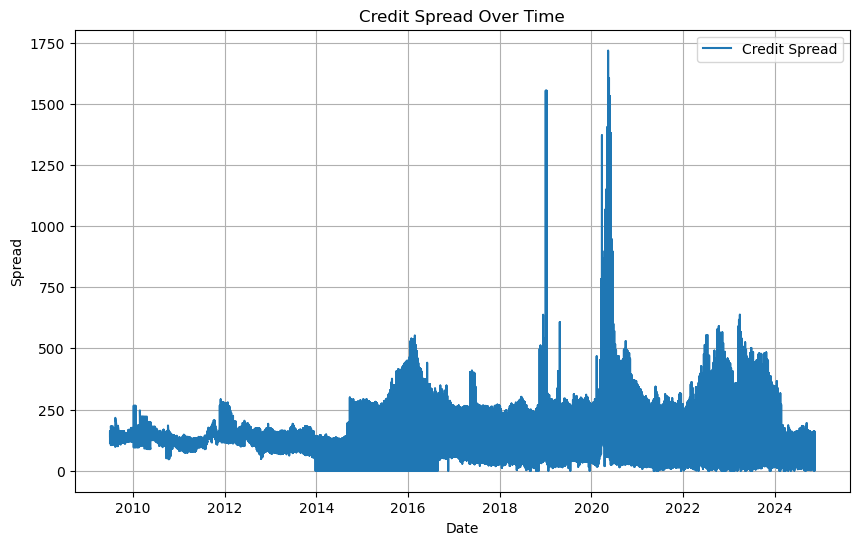

In [85]:
plot_time_series(credit, 'Credit')

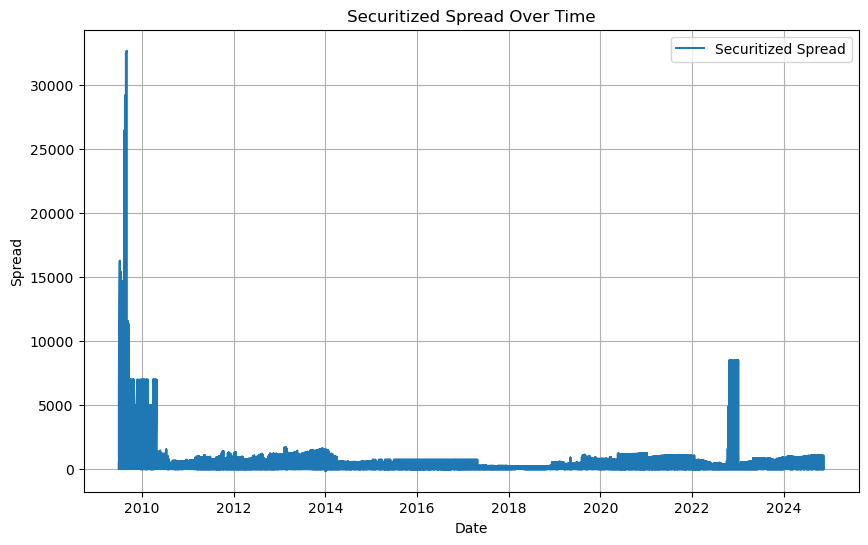

In [86]:
plot_time_series(securitized, 'Securitized')

- specific cusip

In [87]:
specific_cusip = '00206RBH4'
cusip_data = resolved[resolved['CUSIP'] == specific_cusip]

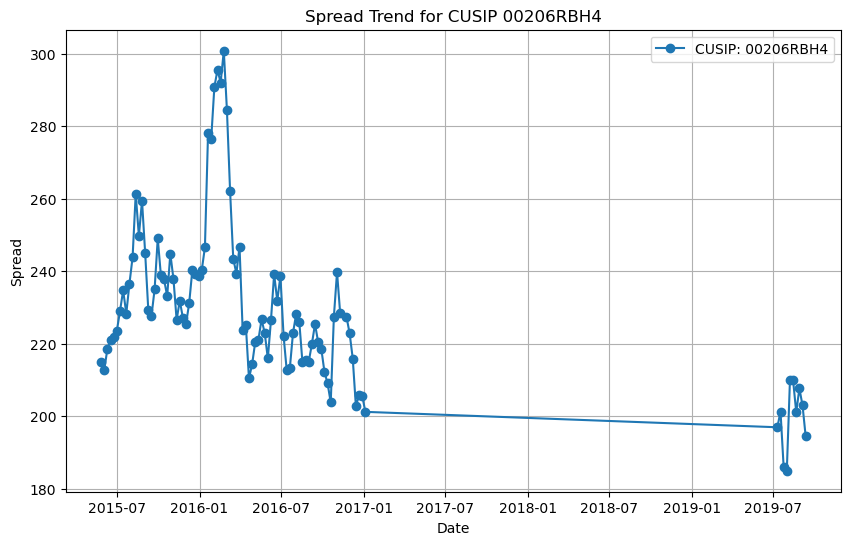

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(cusip_data['Date'], cusip_data['spread'], marker='o', label=f"CUSIP: {specific_cusip}")
plt.xlabel('Date')
plt.ylabel('Spread')
plt.title(f'Spread Trend for CUSIP {specific_cusip}')
plt.legend()
plt.grid()
plt.show()

In [89]:
output = "/Users/ottffssdlh/Downloads/FinalCleanData.xlsx"
final.to_excel(output, index=False)

In [91]:
data = pd.read_excel('/Users/ottffssdlh/Downloads/FinalCleanData.xlsx')
data

,Date,CUSIP,asset_type,maturity_date,next_call_date,credit_rating,coupon_rate,closing_price,spread,current_yield,ytm,duration,modified_duration
0,2009-07-01,002824AV2,Credit,2039-04-01,NaT,Aa2,6.000,108.793602,113.450302,5.515030,5.4001,14.631800,14.247120
1,2009-07-01,05949ARU6,Securitized,2013-06-25,2014-02-25,Aa2,4.317,90.000000,456.928314,4.796667,10.4868,3.096200,2.941942
2,2009-07-01,31379AAH8,Securitized,2012-02-19,NaT,AGC,6.500,107.568436,63.449997,6.042665,0.2774,2.448500,2.445109
3,2009-07-01,31393CVK6,Securitized,2012-03-11,NaT,AGC,6.000,14.379910,414.932983,41.724876,42.0532,2.291600,1.893468
4,2009-07-01,31402C4H2,Securitized,2013-04-25,NaT,AGC,5.500,103.764648,35.900002,5.300457,4.1521,3.133400,3.069672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50503,2024-11-13,90353KAW9_320,Securitized,2026-09-15,NaT,Aaa,4.241,98.374100,78.882095,4.311094,5.0927,1.829148,1.783728
50504,2024-11-13,91159HJN1_75,Credit,2034-06-12,2033-06-10,A2,5.836,104.245598,91.642334,5.598318,5.3394,6.579580,6.408492
50505,2024-11-13,913017BT5_650,Credit,2042-06-01,NaT,Baa1,4.500,90.197937,87.381714,4.989028,5.5654,11.499982,11.188636
50506,2024-11-13,913017CX5_326,Credit,2048-11-16,2048-05-16,Baa1,4.625,89.290443,86.577286,5.179726,5.6297,13.352235,12.986679
